In [1]:
import edhec_risk_kit_206 as erk
import pandas as pd
import numpy as np

In [2]:
ind_rets = erk.get_ind_returns(weighting='vw')
ind_rets = ind_rets['1997':]
ind_mcap = erk.get_ind_market_caps(weights=True)

btr_cw = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr_ew = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
btr = pd.DataFrame(data={'CW': btr_cw, 'EW': btr_ew}).dropna()
erk.summary_stats(btr)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298


In [3]:
btr_ew_tethered = erk.backtest_ws(ind_rets,
                                  estimation_window=36,
                                  weighting=erk.weight_ew,
                                  cap_weights=ind_mcap,
                                  max_cw_mult=2,
                                  microcap_threshold=0.01)
btr['EW Tethered'] = btr_ew_tethered.dropna()
erk.summary_stats(btr)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413


In [4]:
erk.tracking_error(btr_ew, btr_cw)

0.18752094143646486

In [5]:
erk.tracking_error(btr_ew_tethered, btr_cw)

0.11671015519949166

In [6]:
btr_gmv = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
btr['GMV'] = btr_gmv
erk.summary_stats(btr)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
GMV,0.066306,0.117410,-0.741089,4.469212,0.055456,0.080583,0.300815,-0.421289


In [7]:
btr_shrink = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
btr['Shrinkage'] = btr_shrink
erk.summary_stats(btr)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
GMV,0.066306,0.117410,-0.741089,4.469212,0.055456,0.080583,0.300815,-0.421289
Shrinkage,0.068467,0.114572,-0.731294,4.264951,0.053884,0.077715,0.326636,-0.393410


<AxesSubplot:>

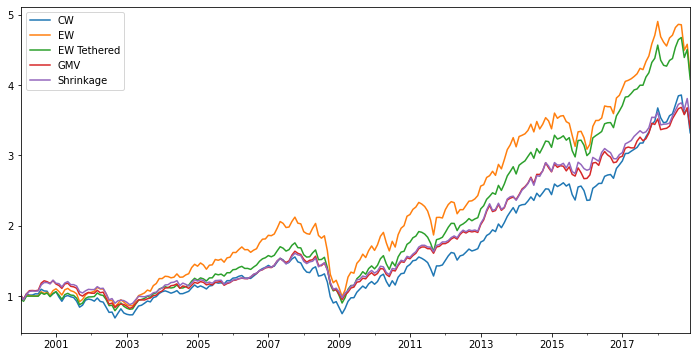

In [8]:
(1+btr).cumprod().plot(figsize=(12,6))